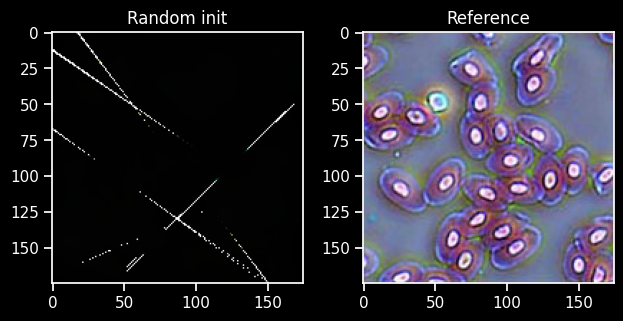

Iteration: 1       Loss: 0.479812
Iteration: 2       Loss: 0.477839
Iteration: 3       Loss: 0.476128
Iteration: 100       Loss: 0.097161
Iteration: 200       Loss: 0.083851
Iteration: 300       Loss: 0.080683
Iteration: 400       Loss: 0.078599
Iteration: 500       Loss: 0.076860
Iteration: 600       Loss: 0.075303
Iteration: 700       Loss: 0.073862
Iteration: 800       Loss: 0.072546
Iteration: 900       Loss: 0.071311
Iteration: 1000       Loss: 0.070161
Iteration: 1100       Loss: 0.069098
Iteration: 1200       Loss: 0.068045
Iteration: 1300       Loss: 0.067149
Iteration: 1400       Loss: 0.066209
Iteration: 1500       Loss: 0.065418
Iteration: 1600       Loss: 0.064536
Iteration: 1700       Loss: 0.063878
Iteration: 1800       Loss: 0.063148
Iteration: 1900       Loss: 0.062464
Iteration: 2000       Loss: 0.061903
Iteration: 2100       Loss: 0.061210
Iteration: 2200       Loss: 0.060590
Iteration: 2300       Loss: 0.060063
Iteration: 2400       Loss: 0.059555
Iteration: 2500    

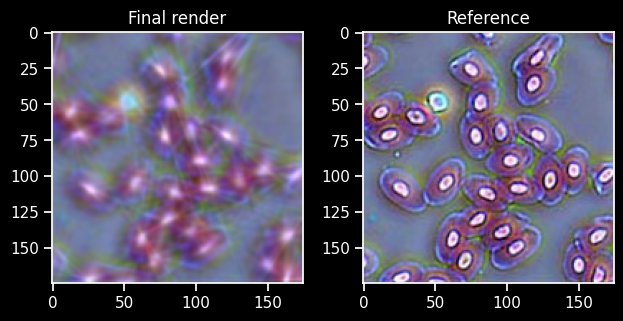

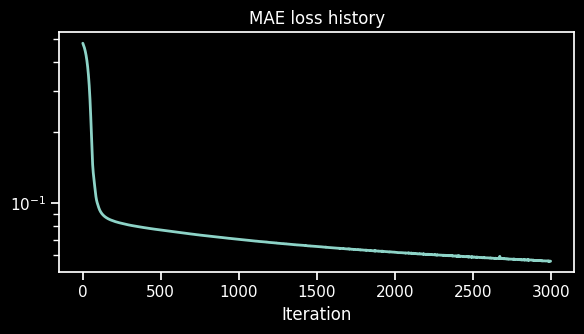

In [2]:
# import jax
from nodesplat import *

import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = "false"
# jax.config.update("jax_enable_x64", True)

# key = jax.random.PRNGKey(42)
key = jax.random.PRNGKey(time.time_ns())
# key = None


## Example iamges downloaded from https://micro.magnet.fsu.edu/primer/java/digitalimaging/processing/jpegcompression/
ref_image = plt.imread('blood.png')[...,:3]
if ref_image.max() > 1:
    ref_image = ref_image/255.

gaussians = init_gaussians(key, ref_image, 1100)
image = render_image(gaussians, ref_image)

fig, (ax) = plt.subplots(1, 2)
sbimshow(image, title="Random init", ax=ax[0])
sbimshow(ref_image, title="Reference", ax=ax[1])
plt.show()

nb_iter = 3000
scheduler = optax.exponential_decay(1e-1, nb_iter, 0.85)
optimiser = optax.adam(scheduler)
opt_state = optimiser.init(gaussians)

losses = []
# start_time = time.time()
for i in tqdm(range(1, nb_iter+1), disable=True):
    gaussians, opt_state, loss = train_step(gaussians, ref_image, opt_state, optimiser)
    losses.append(loss)
    if i % 100 == 0 or i <= 3:
        print(f'Iteration: {i}       Loss: {loss:.6f}')
# wall_time = time.time() - start_time

## Number of params in scene
print("\nNumber of params:", jnp.size(gaussians))
print("Number of pixels:", jnp.size(ref_image))
print(f"Compression ration: {jnp.size(ref_image)/jnp.size(gaussians):.1f}:1")

image = render_image(gaussians, ref_image)

fig, (ax) = plt.subplots(1, 2)
sbimshow(image, title="Final render", ax=ax[0])
sbimshow(ref_image, title="Reference", ax=ax[1])


sbplot(losses, title="MAE loss history", y_scale='log', x_label="Iteration");